In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
single_img = x_train[0]

In [7]:
single_img.shape

(28, 28)

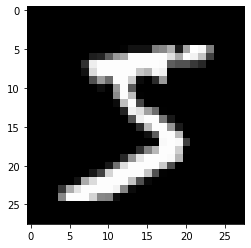

In [9]:
plt.imshow(single_img,cmap='gray')

In [11]:
len(x_train)

60000

In [14]:
y_train.shape

(60000,)

# Data Preprocessing

In [15]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_cat = to_categorical(y_train)

In [20]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test)

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
single_img.max() , single_img.min()

(255, 0)

In [27]:
x_train = x_train/255
x_test = x_test/255

In [29]:
x_train[0].max() , x_train[0].min()

(1.0, 0.0)

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

Reshape the Image data set according to ( batch_size , Len , width , channels )

In [33]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Creating and training the Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#OUTPUT LAYER FOR MULTI CLASS ----> SOFTMAX 
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

Hyperparameters that should be fixed and should be according to input data are :

1. 'input_shape' 

2. Flatten() layer

3. Number of units in output layer

Hyperparameters that can be varied and experimented with are 

1. filters , kernel size , padding and stride length in Convolutional layer

2. pool_size of maxpooling layer according to input image dimensions

3. Number of units in Dense layers and Dense layers after pooling layer

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
earlystop = EarlyStopping(monitor='val_loss',patience=1)

In [39]:
model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[earlystop])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1357 - accuracy: 0.9595 - val_loss: 0.0534 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0440 - val_accuracy: 0.9840


In [43]:
loss = pd.DataFrame(model.history.history)

In [45]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.135683,0.959517,0.053391,0.9817
1,0.045740,0.986100,0.038226,0.9870
2,0.028815,0.991167,0.044040,0.9840


<AxesSubplot:>

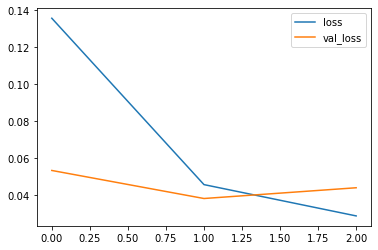

In [46]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

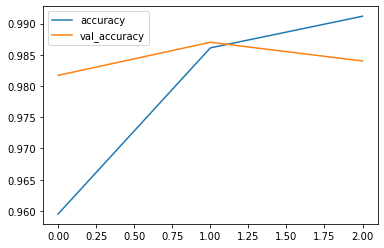

In [47]:
loss[['accuracy','val_accuracy']].plot()

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9840


[0.04404035955667496, 0.984000027179718]

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [55]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    3,    1,    0,    2,    0,    0,    1,    0],
       [   0, 1124,    7,    1,    0,    1,    2,    0,    0,    0],
       [   1,    1, 1023,    1,    0,    0,    0,    6,    0,    0],
       [   0,    0,    2,  996,    0,    7,    0,    1,    1,    3],
       [   0,    0,    0,    0,  968,    0,    0,    0,    1,   13],
       [   1,    0,    0,    8,    0,  880,    1,    0,    0,    2],
       [   5,    1,    2,    1,    1,   11,  937,    0,    0,    0],
       [   1,    1,    7,    1,    0,    1,    0, 1006,    0,   11],
       [   5,    0,   12,    2,    0,    1,    1,    3,  935,   15],
       [   0,    1,    0,    4,    1,    4,    0,    1,    0,  998]])

In [59]:
my_num = x_test[0]

In [60]:
my_num.shape

(28, 28, 1)

In [61]:
my_num

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

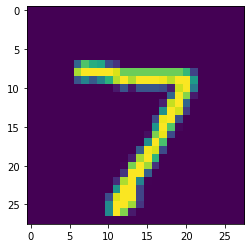

In [62]:
plt.imshow(my_num)

In [66]:
 print("the prediction of the above image is ",model.predict_classes(my_num.reshape(1,28,28,1))[0])

the prediction of the above image is  7
